In [2]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [3]:
api = wandb.Api()
resnet101 = api.run("jer2ig/yoloclassify/2gdg59rn")
vgg16 = api.run("jer2ig/yoloclassify/2gdg59rn")
nano = api.run("jer2ig/yoloclassify/1u9jocpm")
small = api.run("jer2ig/yoloclassify/3sggza9m")
medium = api.run("jer2ig/yoloclassify/2izjmjdu")
large = api.run("jer2ig/yoloclassify/37wflzaq")
xlarge = api.run("jer2ig/yoloclassify/872vs32w")



vgg = api.run("jer2ig/yolo_fork-damage_assessment/2xzt2ha9")

# Plot data

C:\Users\Julius\AppData\Local\Temp/ipykernel_1584/1864191997.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


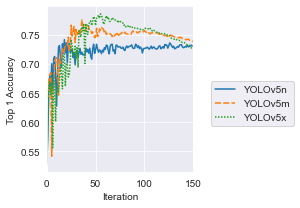

In [5]:
vgg_hist = vgg.history(x_axis="_step", pandas=(True), stream="default")
vgg_hist = vgg_hist.rename(columns={"val/Loss": "test/loss",
                                    "train/Loss": "train/loss",
                                    "val/Acc@1" : "metrics/accuracy_top1"
                                    })
vgg_hist["metrics/accuracy_top1"] /= 100
vgg_hist = vgg_hist.rename(columns=lambda c: "vgg:"+str(c))
resnet101_hist = resnet101.history(x_axis="_step", pandas=(True), stream="default")
resnet101_hist = resnet101_hist.rename(columns=lambda c: "resnet101:"+str(c))
nano_hist = nano.history(x_axis="_step", pandas=(True), stream="default")
nano_hist = nano_hist.rename(columns=lambda c: "nano:"+str(c))
small_hist = small.history(x_axis="_step", pandas=(True), stream="default")
small_hist = small_hist.rename(columns=lambda c: "small:"+str(c))
medium_hist = medium.history(x_axis="_step", pandas=(True), stream="default")
medium_hist = medium_hist.rename(columns=lambda c: "medium:"+str(c))
large_hist = large.history(x_axis="_step", pandas=(True), stream="default")
large_hist = large_hist.rename(columns=lambda c: "large:"+str(c))
xlarge_hist = xlarge.history(x_axis="_step", pandas=(True), stream="default")
xlarge_hist = xlarge_hist.rename(columns=lambda c: "xlarge:"+str(c))

runs = pd.concat([nano_hist, medium_hist, xlarge_hist], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))

sns.lineplot(data=runs.filter(regex="accuracy_top1"),legend=None, ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Top 1 Accuracy")
#ax.set_ylim(0,1)
ax.set_xlim(0,150)

fig.tight_layout()
fig.legend(labels=["YOLOv5n", "YOLOv5m", "YOLOv5x"],loc='right', bbox_to_anchor=(1.40, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
fig.savefig('acc_classification.pdf', bbox_inches='tight')


C:\Users\Julius\AppData\Local\Temp/ipykernel_1584/252234496.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


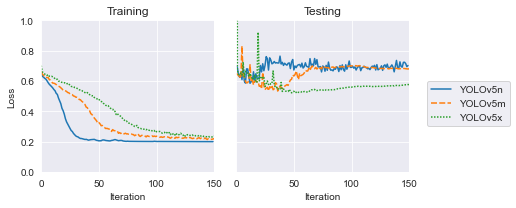

In [6]:
fig, ax = plt.subplots(1, 2,sharey='row',sharex= 'col', figsize=(6, 3))

ax[0].set_title("Training")
ax[1].set_title("Testing")

sns.lineplot(data=runs.filter(regex="train/loss"),legend=None, ax=ax[0])
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Iteration")
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,150)
sns.lineplot(data=runs.filter(regex="test/loss"),legend=None, ax=ax[1])
ax[1].set_xlabel("Iteration")
ax[1].set_xlim(0,150)


#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["YOLOv5n", "YOLOv5m", "YOLOv5x"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('loss_classification.pdf', bbox_inches='tight')

In [25]:
runs.filter(regex="accuracy_top1").max()

resnet101:metrics/accuracy_top1    0.800377
nano:metrics/accuracy_top1         0.741996
medium:metrics/accuracy_top1       0.775518
xlarge:metrics/accuracy_top1       0.786064
dtype: float64